Figure saved to: ../results/figures/strategy_comparison.png


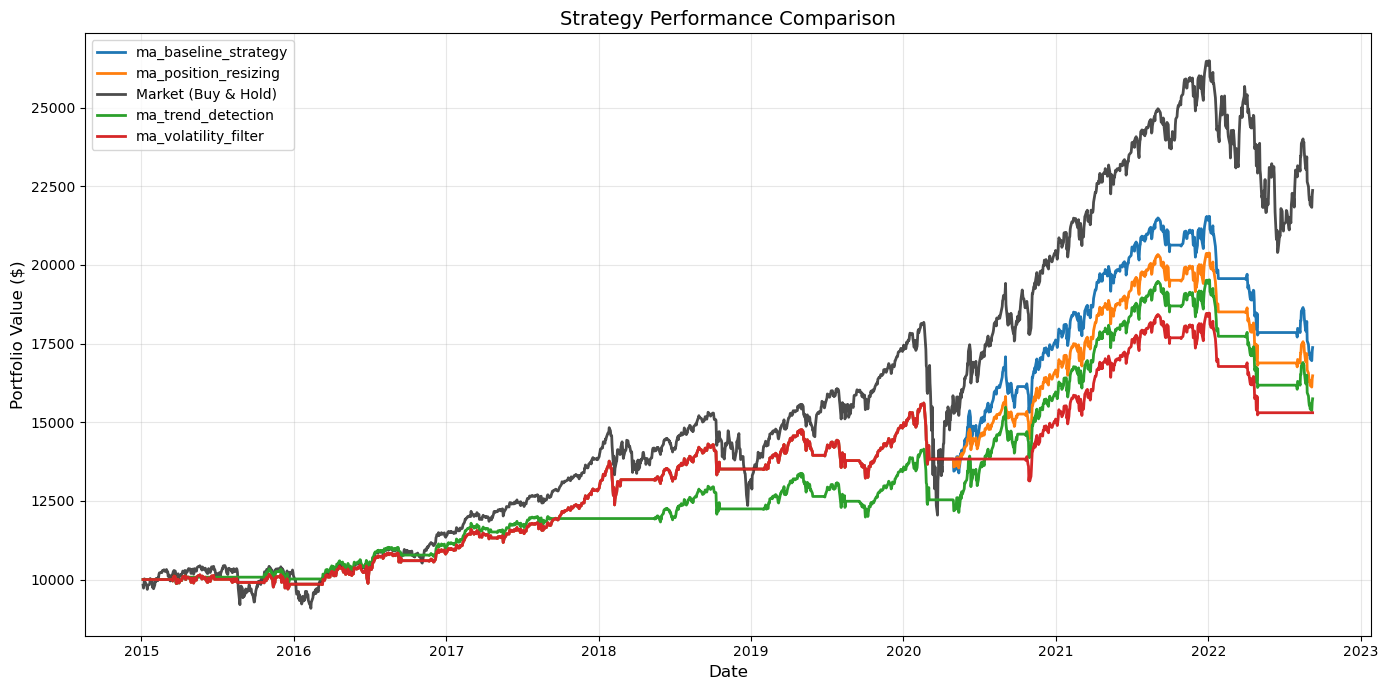

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

directory_path = Path('../data/strategy_results/')

plt.figure(figsize=(14, 7))

# Track if we've plotted market yet (only plot once)
market_plotted = False

for file_path in directory_path.iterdir():
    # Skip non-CSV files
    if file_path.suffix != '.csv':
        continue
    
    # Read the CSV
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Plot strategy
    strategy_name = file_path.stem  # Filename without .csv
    plt.plot(df.index, df['portfolio_value'], 
             label=strategy_name, linewidth=2)
    
    # Plot market (only once)
    if not market_plotted and 'market_portfolio_value' in df.columns:
        plt.plot(df.index, df['market_portfolio_value'], 
                label='Market (Buy & Hold)', linewidth=2, 
                 color='black', alpha=0.7)
        market_plotted = True

plt.title('Strategy Performance Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the figure
output_folder = Path('../results/figures/')
output_folder.mkdir(parents=True, exist_ok=True)  # Create folder if doesn't exist

output_path = output_folder / 'strategy_comparison.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # dpi=300 for high quality
print(f'Figure saved to: {output_path}')

plt.show()